**Computational Imaging**
**Lab Session 1 : Basics of image processing**

First step: load an image (choose the astronaut or the lighthouse)

In [1]:
from skimage import data
from skimage.io import imread
import matplotlib.pyplot as plt
#%matplotlib notebook #does not work in colab but should work in notebook
import numpy as np

epsilon = 1e-6
original = data.astronaut()
#original = imread('Lighthouse.png')
original = (original +epsilon)/np.max(original) 

plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(original,vmin=0,vmax=1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 2000x2000 with 1 Axes>

**Question 1:** what is the range of the intensity values?

In [2]:
#3.9215686274509805e-09
#1.0000000039215686

print(np.min(original, axis=(0,1)))
print(np.max(original, axis=(0,1)))

# So we can find that for all three channels, the range is from 3.9215686274509805e-09 to 1.0000000039215686

[3.92156863e-09 3.92156863e-09 3.92156863e-09]
[1. 1. 1.]


An image can be modeled as a function $f$ such as $f$:  $\Omega \mapsto \mathbb{R}^d$.

**Question 2:** what is the image domain $\Omega$? What is the value of $d$?

In [3]:
# Ω is the observation and d (512*512*3) (3) 

**Simulation of RAW images (applying a reverse Bayer filter)**

In [4]:
#Simulating Reverse Bayer Filter
red = original[:,:,0]
green = original[:,:,1]
blue = original[:,:,2]

bayer_red = np.zeros(red.shape)
bayer_red[1::2,1::2] = red[1::2,1::2]

bayer_blue = np.zeros(blue.shape)
bayer_blue[::2,::2] = blue[::2,::2]

bayer_green = np.zeros(green.shape)
bayer_green[1::2,::2] = green[1::2,::2]
bayer_green[::2,1::2] = green[::2,1::2]

**Question 3:** Check the values of the simulated Bayer images.

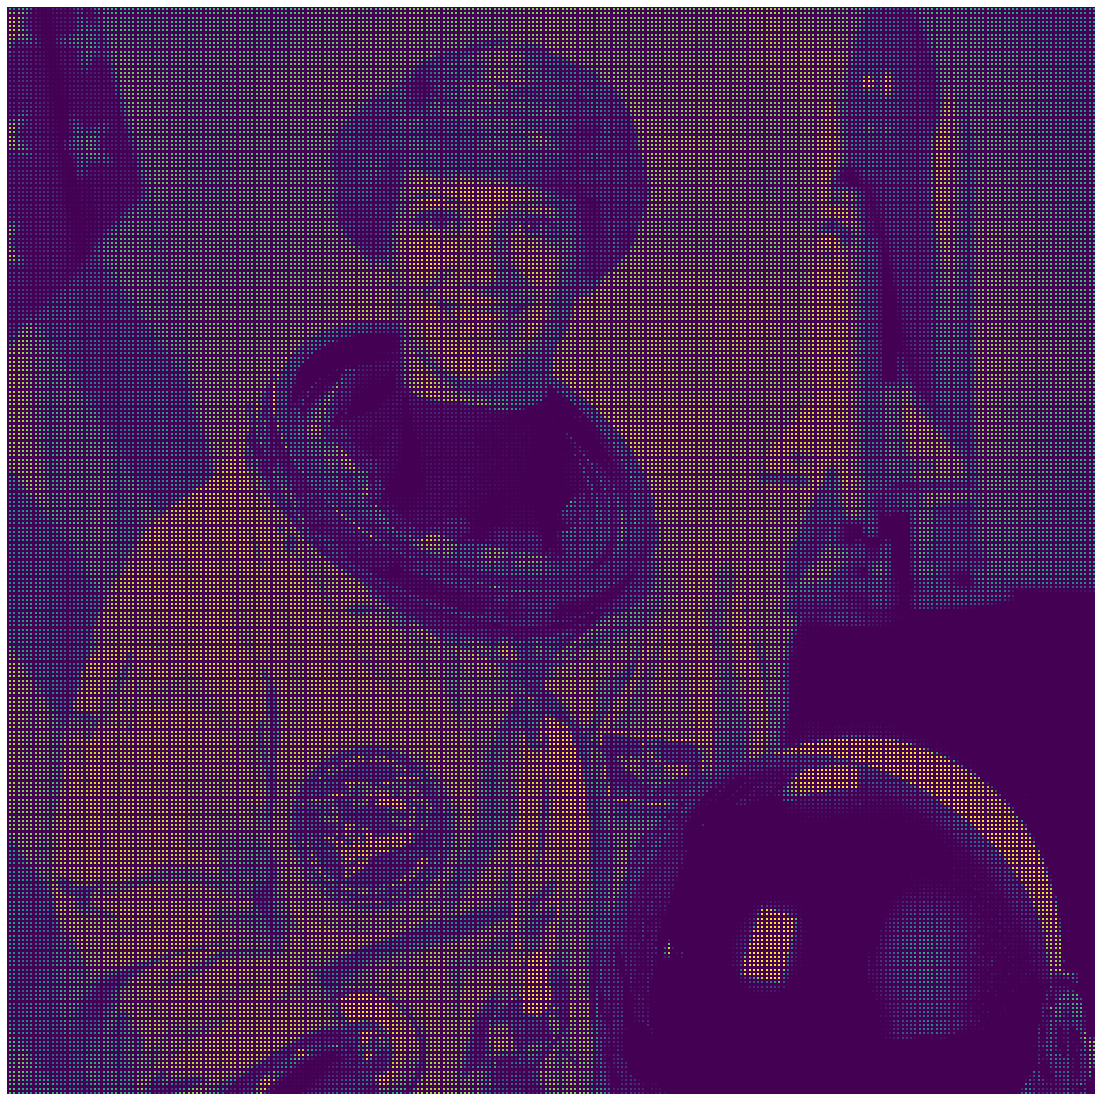

"\n#plot bayer green\nplt.figure(figsize=(20,20))\nplt.axis('off')\nplt.imshow(bayer_green,vmin=0,vmax=1)\nplt.show()\n\n#plot bayer blue\nplt.figure(figsize=(20,20))\nplt.axis('off')\nplt.imshow(bayer_blue,vmin=0,vmax=1)\nplt.show()"

In [5]:
# plot bayer red 
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(bayer_red,vmin=0,vmax=1)
plt.show()

"""
#plot bayer green
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(bayer_green,vmin=0,vmax=1)
plt.show()

#plot bayer blue
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(bayer_blue,vmin=0,vmax=1)
plt.show()"""

**Question 4:** Reconstruct an RGB image from the 3 Bayer images and visualize it.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


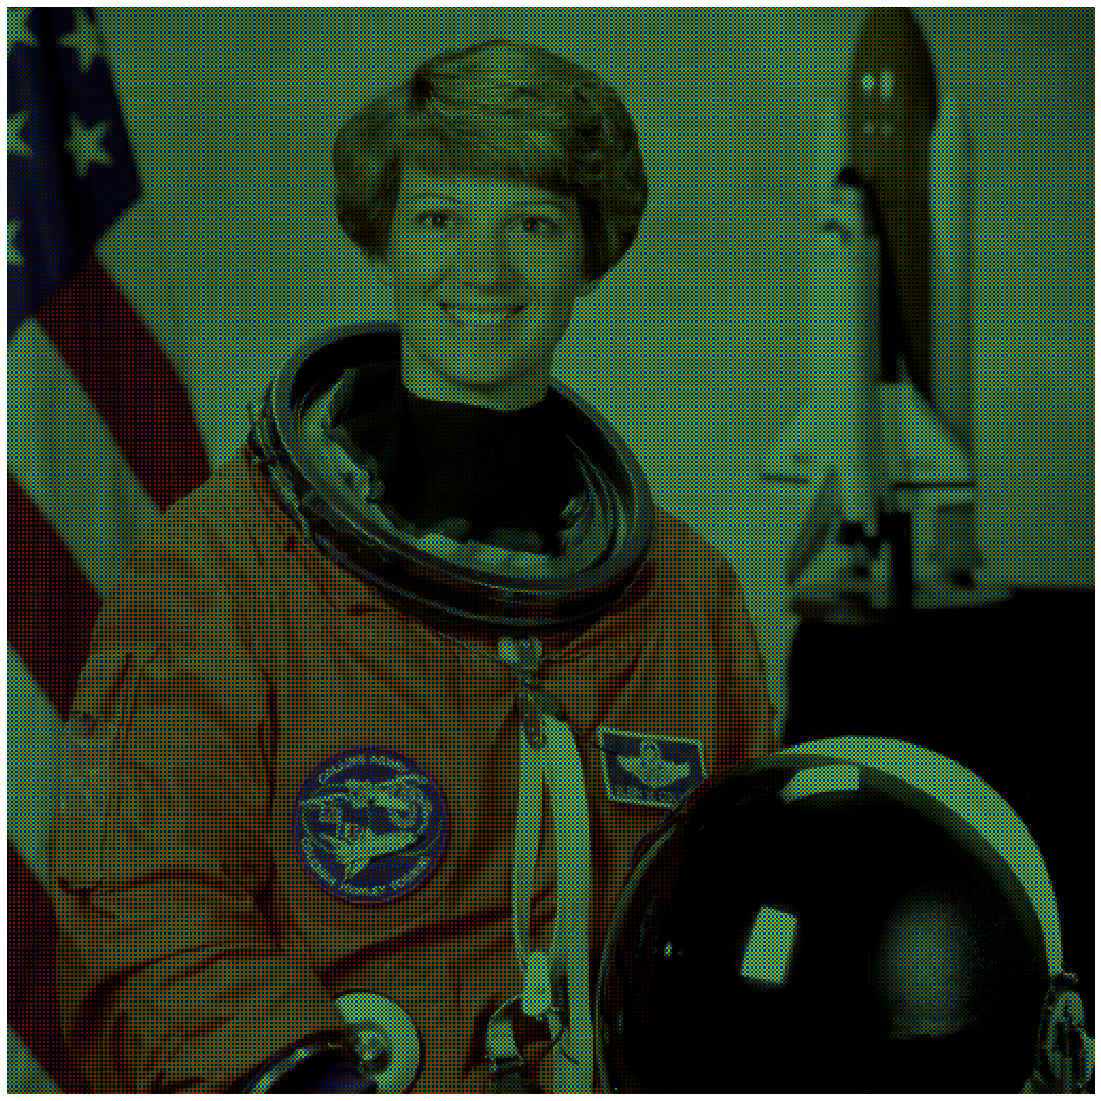

In [6]:
bayer_raw  = np.zeros(original.shape)
bayer_raw[:,:,0] = bayer_red
bayer_raw[:,:,1] = bayer_green
bayer_raw[:,:,2] = bayer_blue
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(bayer_raw,vmin=0,vmax=1)
plt.show()

**Question 5 :** Reconstruct the RGB image using interpolation methods on the spatial domain $\Omega$ (using the [griddata function from scipy](http://lagrange.univ-lyon1.fr/docs/scipy/0.17.1/generated/scipy.interpolate.griddata.html)).

In [7]:
from scipy.interpolate import griddata

def Interp_Image(bayer_red, bayer_green, bayer_blue, original, method):
    grid = np.transpose(np.asarray(np.nonzero(np.ones(bayer_red.shape))))

    data_red = bayer_red[bayer_red !=0]
    mask_red = np.transpose(np.asarray((np.nonzero(bayer_red))))
    # fill value is necessary, otherwise ssim will return nan value 
    # Value used to fill in for requested points outside of the convex hull of the input points. 
    # If not provided, then the default is nan. This option has no effect for the ‘nearest’ method.
    interp_red = griddata(mask_red, data_red, grid, method=method, fill_value = 0)
    interp_red = interp_red.reshape(bayer_red.shape)

    data_green = bayer_green[bayer_green !=0]
    mask_green = np.transpose(np.asarray((np.nonzero(bayer_green))))
    interp_green = griddata(mask_green, data_green, grid, method=method, fill_value = 0)
    interp_green = interp_green.reshape(bayer_green.shape)

    data_blue = bayer_blue[bayer_blue !=0]
    mask_blue = np.transpose(np.asarray((np.nonzero(bayer_blue))))
    interp_blue = griddata(mask_blue, data_blue, grid, method=method, fill_value = 0)
    interp_blue = interp_blue.reshape(bayer_blue.shape)

    image_interp = np.zeros(original.shape)
    image_interp[:,:,0] = interp_red
    image_interp[:,:,1] = interp_green
    image_interp[:,:,2] = interp_blue
    return image_interp

image_linear = Interp_Image(bayer_red, bayer_green, bayer_blue, original,'linear')
image_cubic = Interp_Image(bayer_red, bayer_green, bayer_blue, original,'cubic')
image_nearest = Interp_Image(bayer_red, bayer_green, bayer_blue, original,'nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


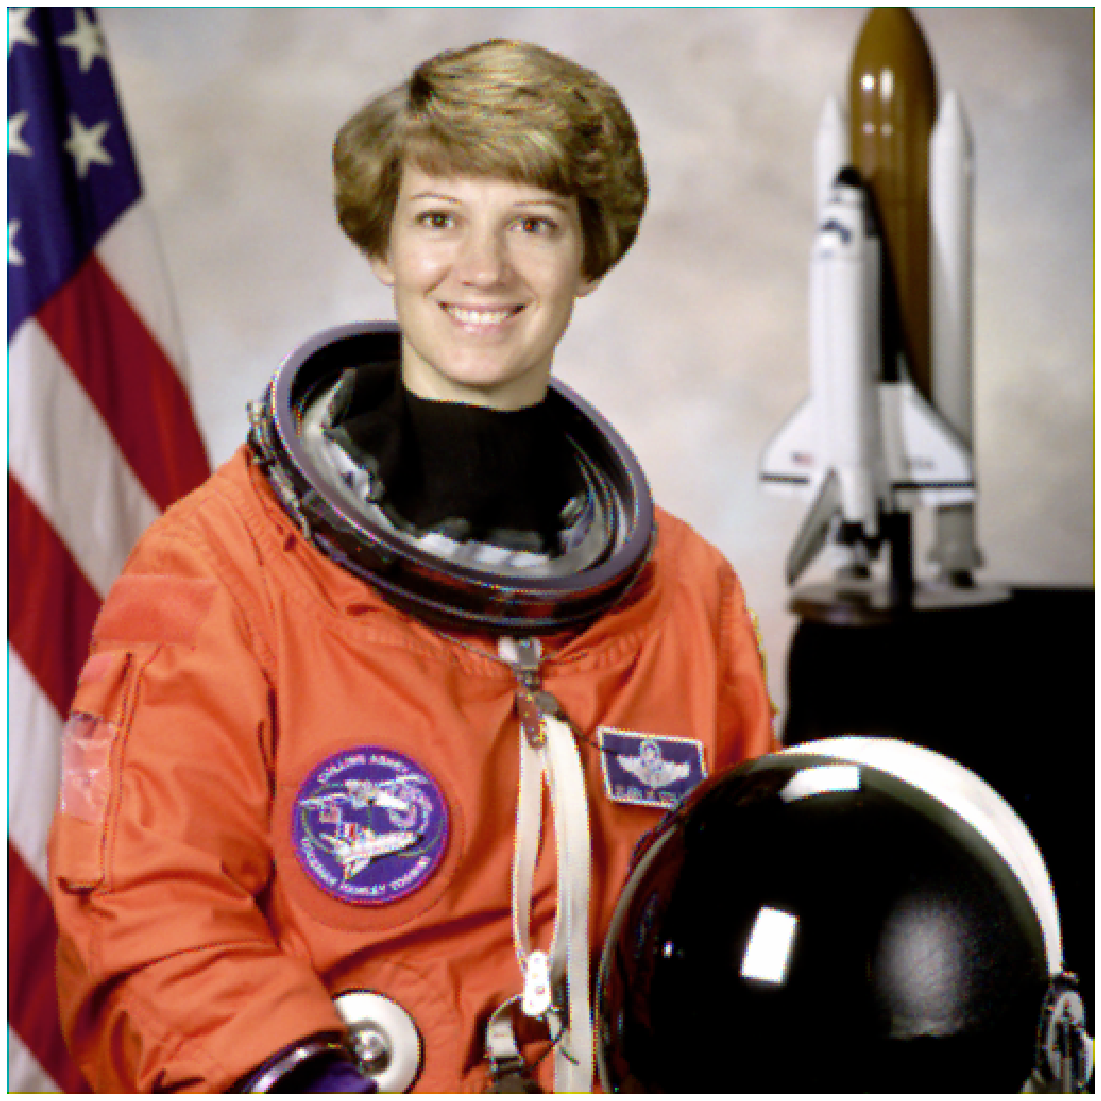

In [8]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_linear,vmin=0,vmax=1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


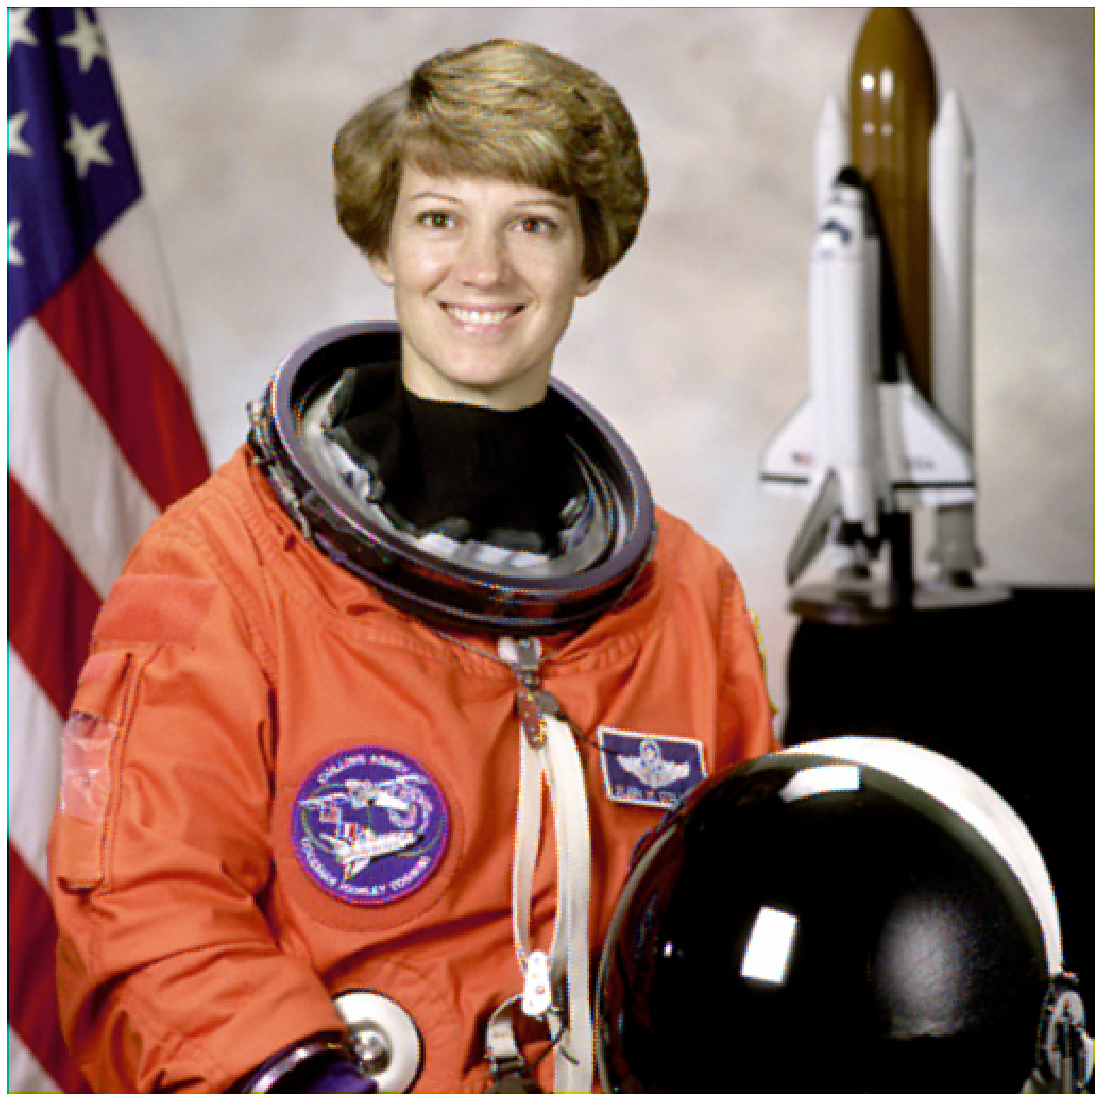

In [9]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_cubic,vmin=0,vmax=1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


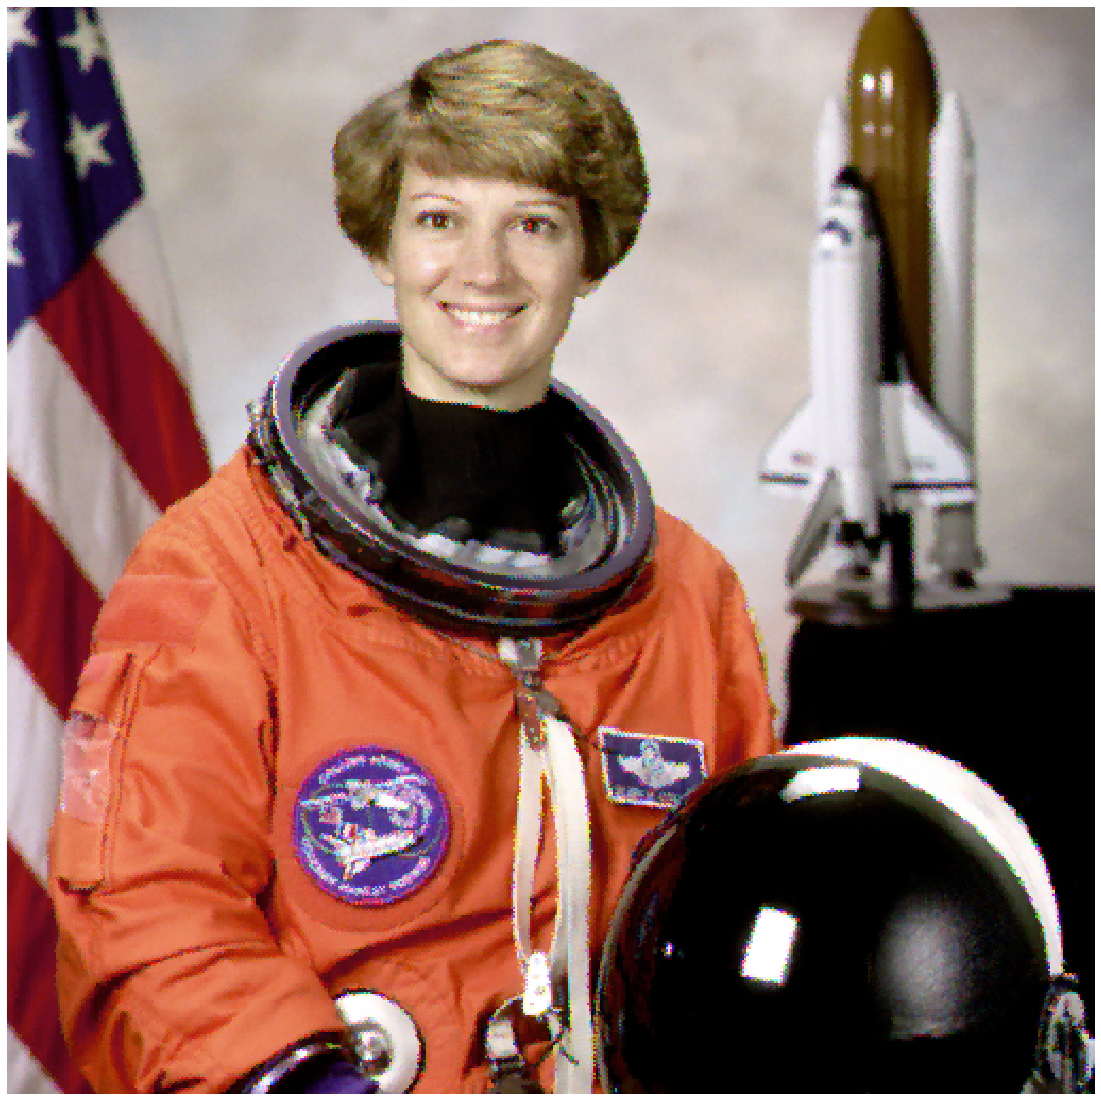

In [10]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_nearest,vmin=0,vmax=1)
plt.show()

**Question 6 :** what do you observe?

Answer : 

**Question 7 :** Evaluate the quality of the reconstructed images (using different interpolation methods) using MSE, PSNR and SSIM ([see skimage.metrics](https://scikit-image.org/docs/stable/api/skimage.metrics.html)).



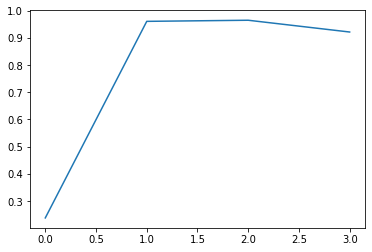

In [12]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse
 


ssims= []
ssims.append(ssim(original, bayer_raw, multichannel=True))
ssims.append(ssim(original, image_linear, multichannel=True))
ssims.append(ssim(original, image_cubic, multichannel=True))
ssims.append(ssim(original, image_nearest, multichannel=True))
plt.plot(ssims)
plt.show()

In [13]:
ssims

[0.2376803694555475,
 0.9605280519056842,
 0.9646114609267379,
 0.9213119054794233]

**Image filtering**

**Question 8 :** convert the original RGB astronaut image into grayscale and display the result.

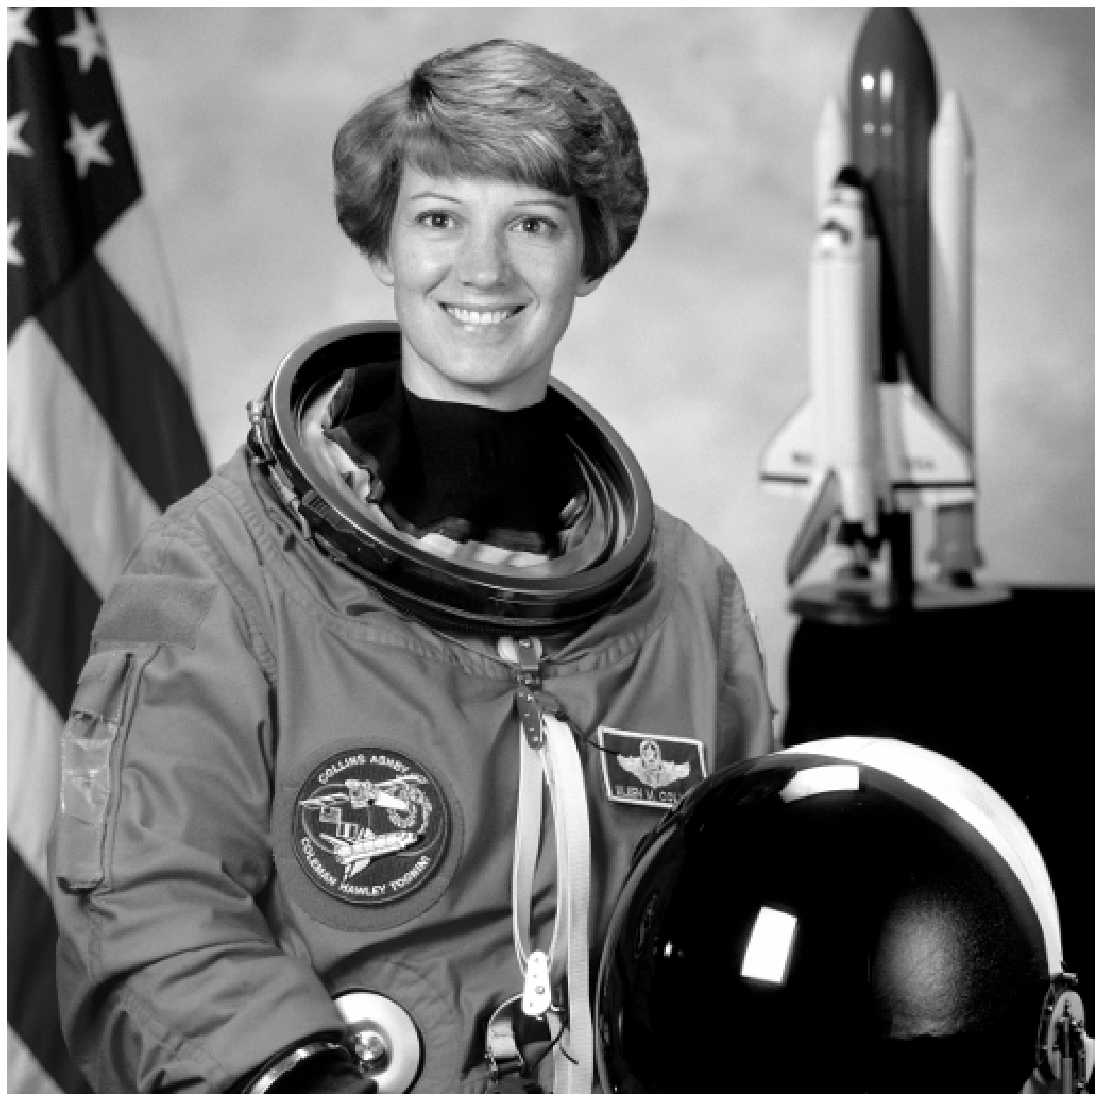

In [14]:
from skimage.color import rgb2gray

image_gray = rgb2gray(original)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_gray, vmin=0,vmax=1,cmap='gray')
plt.show()


**Question 9 :** using [the convolve function from scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.ndimage.filters.convolve.html), define an edge magnitude filtering function, and apply it on the grayscale astronaut image.

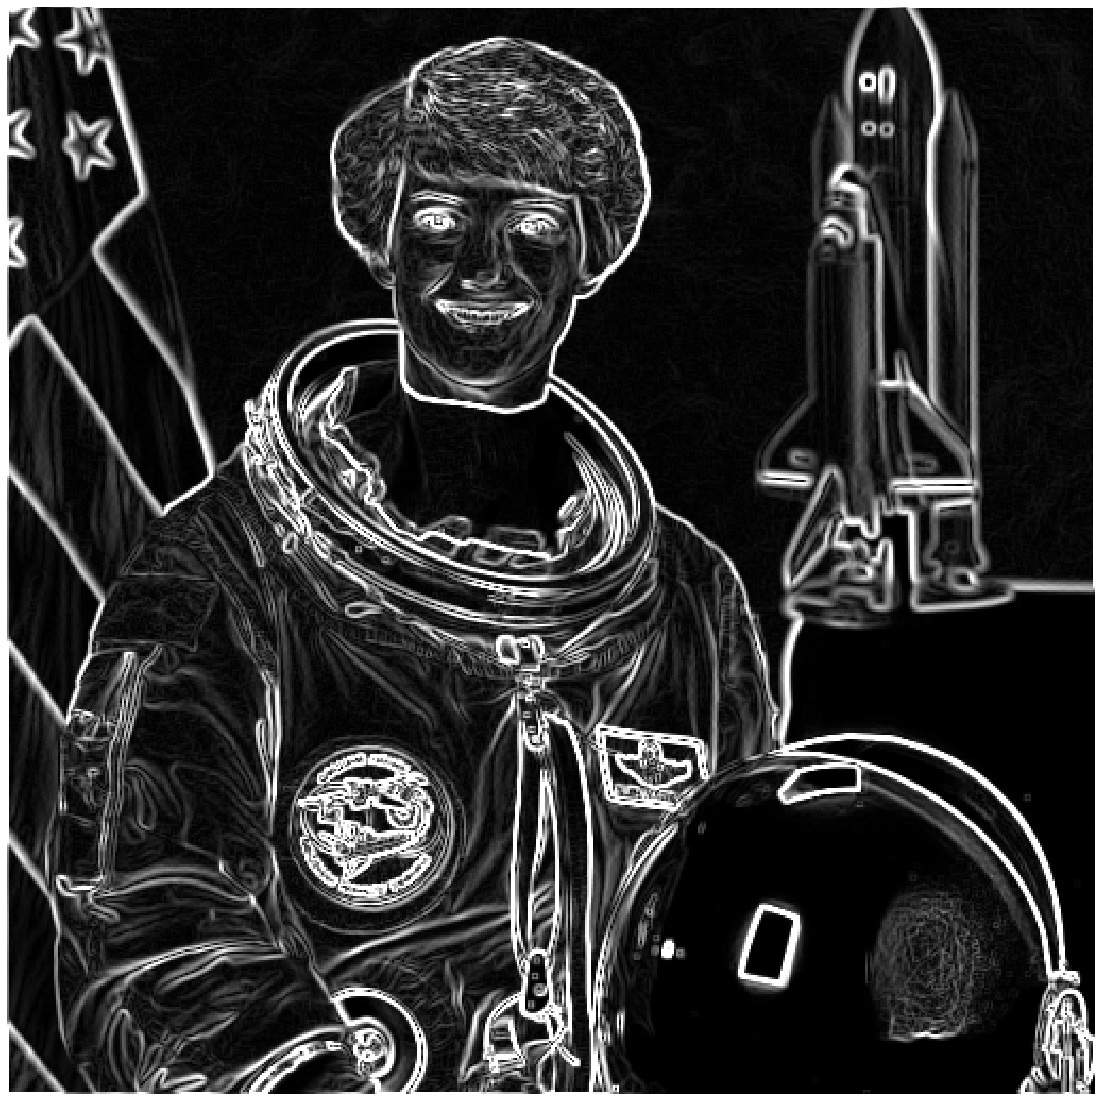

In [15]:
from scipy.ndimage.filters import convolve

pX= np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
pY= np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

result_X = convolve(image_gray, pX, mode='constant', cval=0.0)
result_Y = convolve(image_gray, pY, mode='constant', cval=0.0)

image_edge = np.sqrt(result_X**2+ result_Y**2)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_edge, vmin=0,vmax=1,cmap='gray')
plt.show()

**Fourier Analysis**

**Question 10:** Compute and visualize the magnitude of the FFT of the grayscale image [using Numpy functions](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftn.html) (do not forget to shift zero-frequency terms to centre of array).

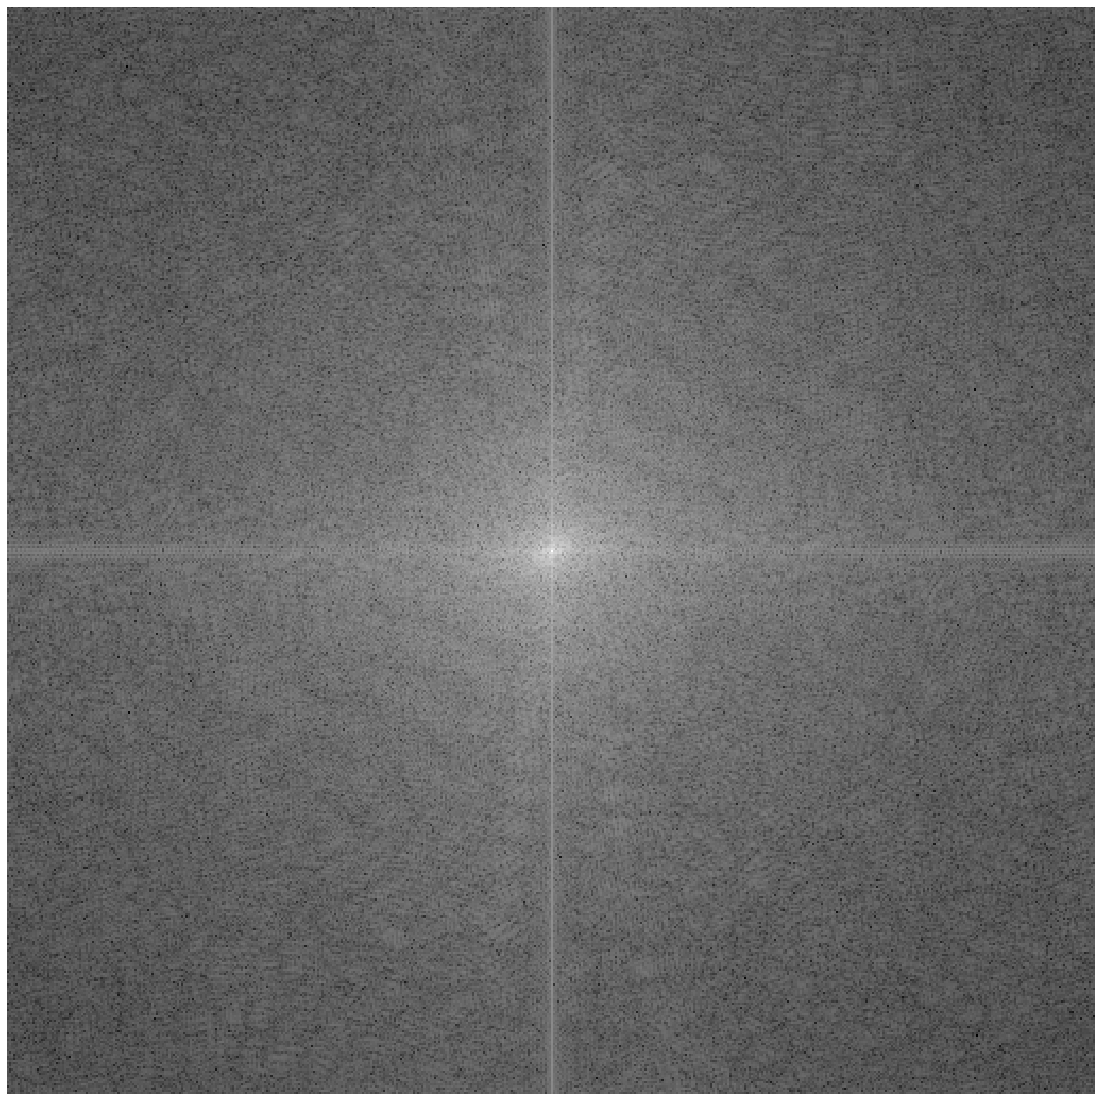

In [20]:
fs_image = np.fft.fftn(image_gray)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(fs_image))**2), cmap='gray')
plt.show()

**Question 11:** What is the impact of a Gaussian filtering in spatial and frequency domains?

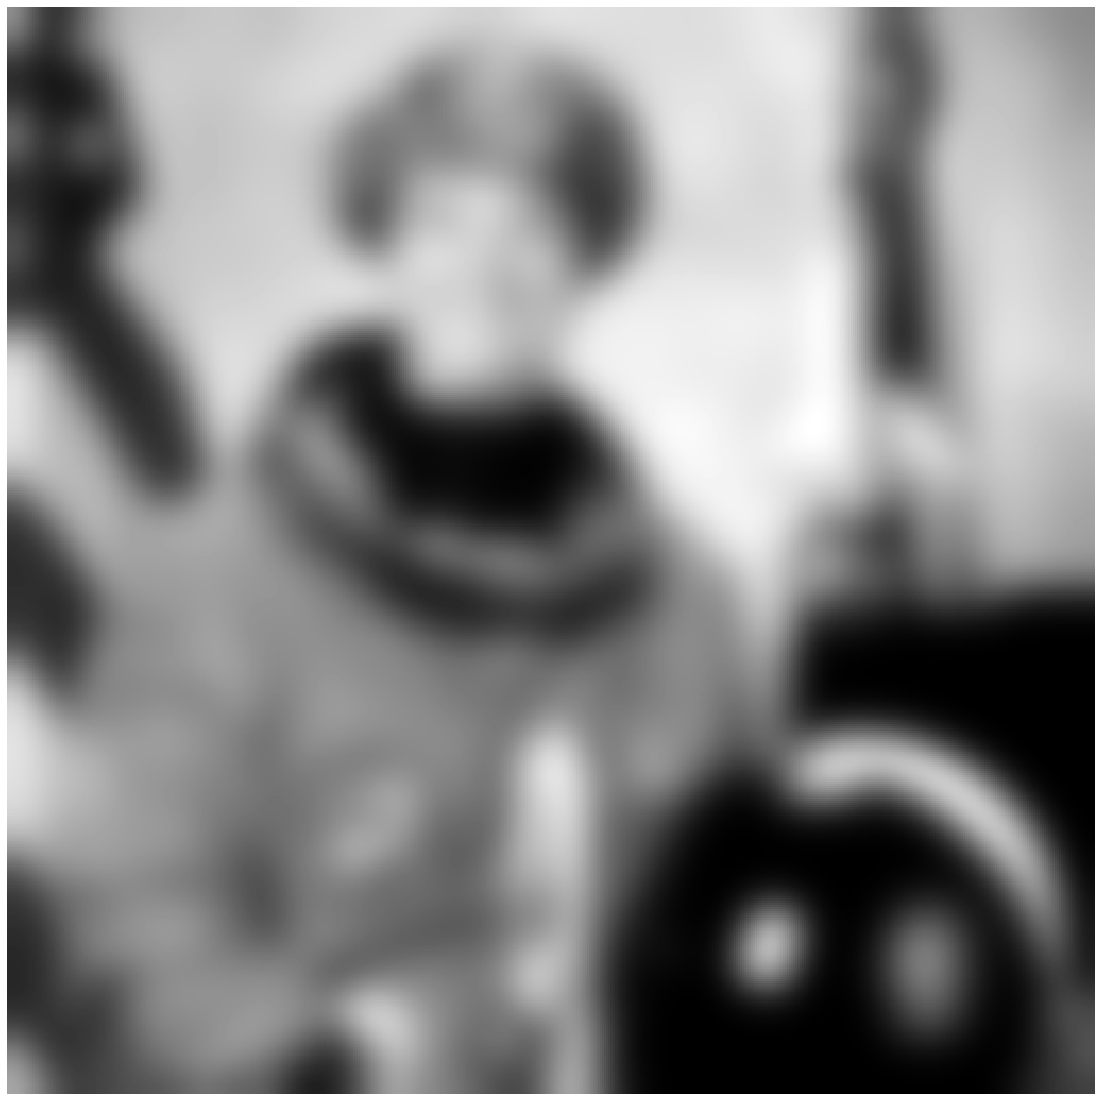

In [27]:
from skimage.filters import gaussian

image_gaussian = gaussian(image_gray, mode='mirror',sigma=10)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_gaussian, cmap='gray')
plt.show()

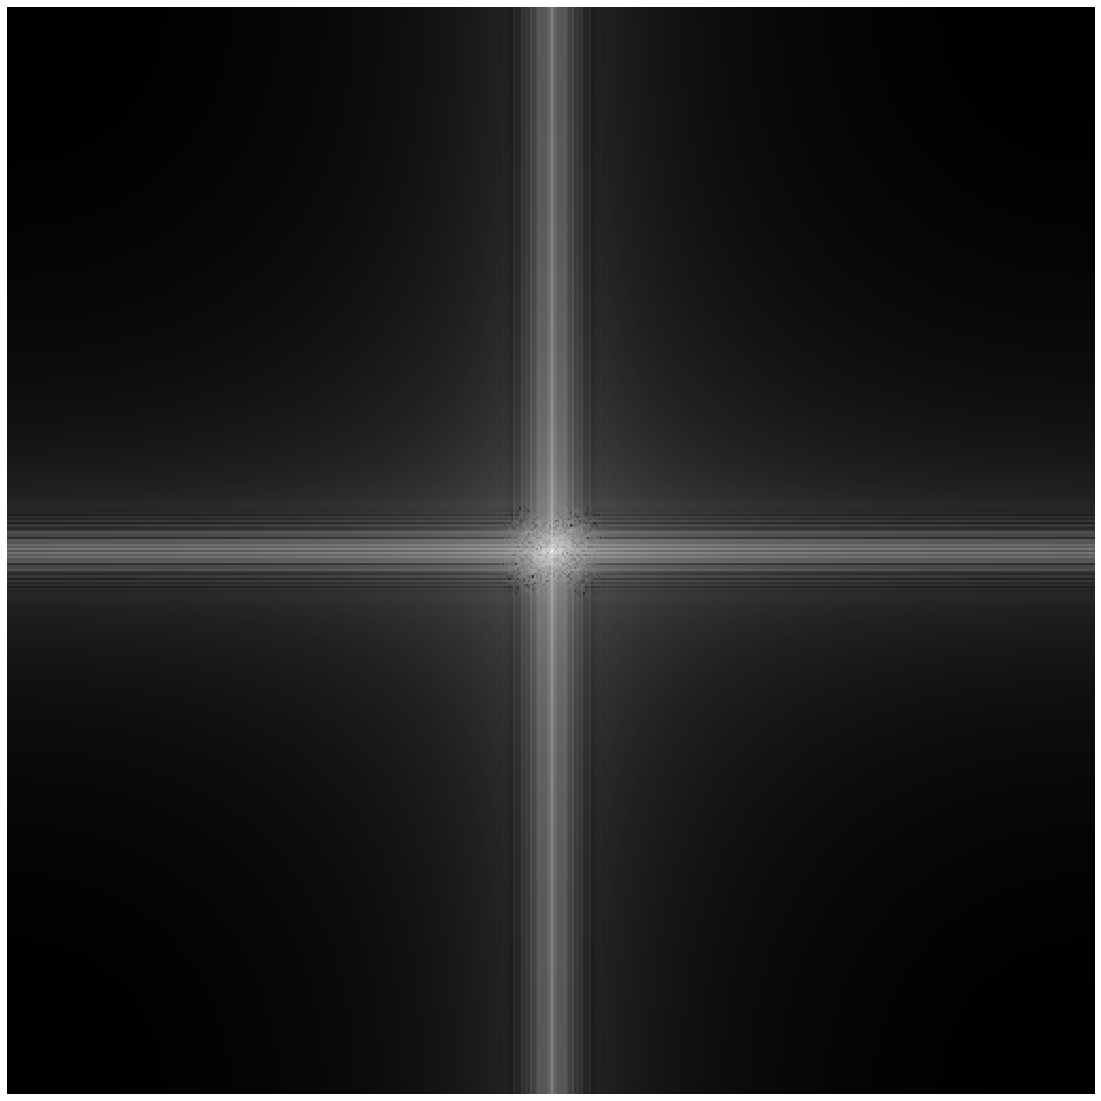

In [28]:
fs_image_gaussian = np.fft.fftn(image_gaussian)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(fs_image_gaussian))**2), cmap='gray')
plt.show()

**Question 12:** Apply a rotation to the grayscale and display it in the frequency domain. 

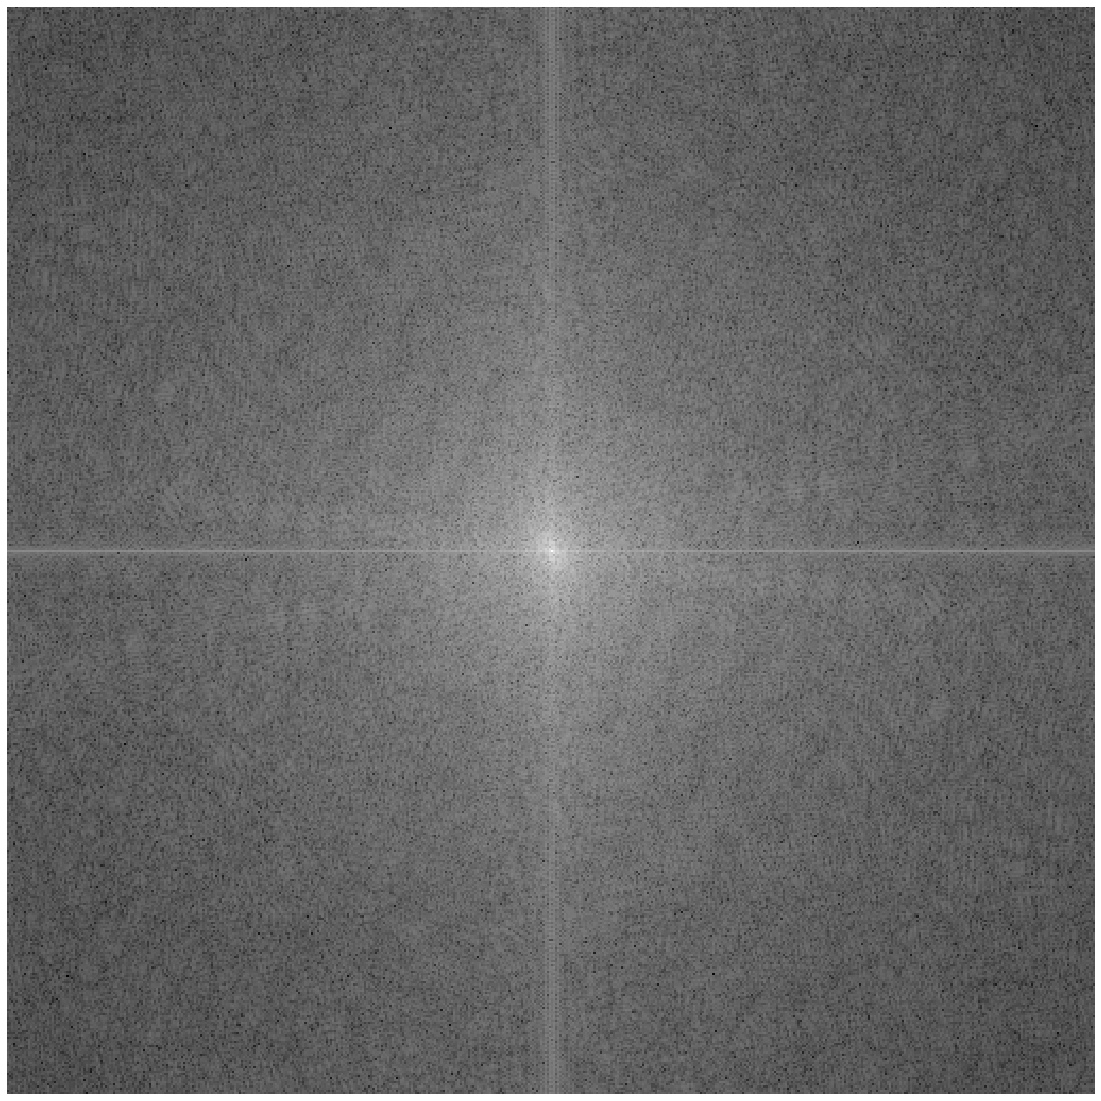

In [29]:
from skimage.transform import rotate

image_gray_cc90 = rotate(image_gray, 90, resize=True)
fs_image_cc90_gaussian = np.fft.fftn(image_gray_cc90)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(fs_image_cc90_gaussian))**2), cmap='gray')
plt.show()

**Question 13:** Apply a low-pass filter by truncating the spectral data, and display the result in the spatial domain.

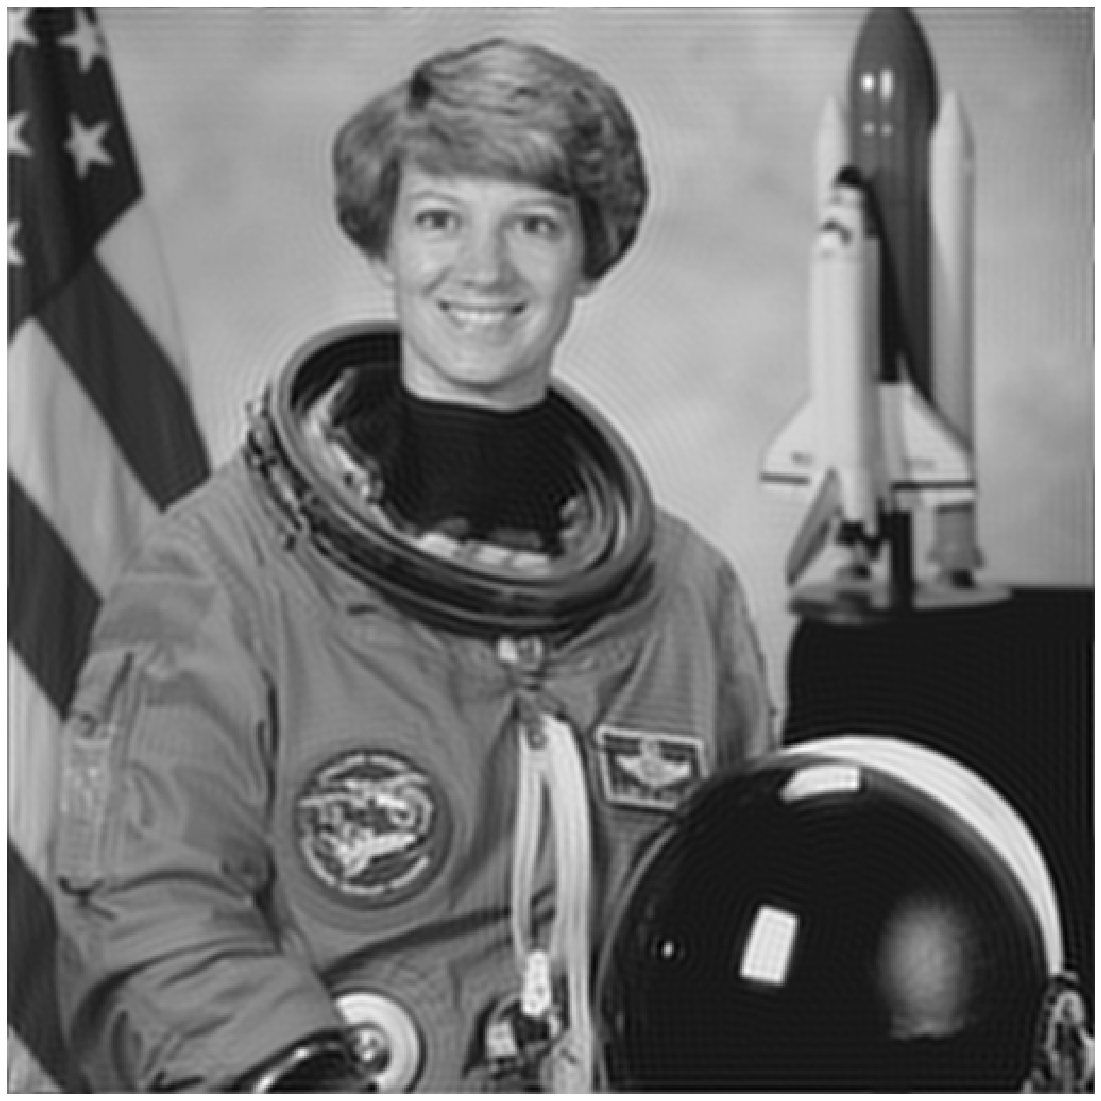

In [46]:
shift_fs = np.fft.fftshift(fs_image)
for i in range(shift_fs.shape[0]):
    for j in range(shift_fs.shape[1]):
        if(((i-255)**2+(j-255)**2)>100**2):
            shift_fs[i][j]=0
image_ishift = np.fft.ifftshift(shift_fs)
recover = np.fft.ifftn(image_ishift)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(recover.real, cmap='gray')
plt.show()

**Question 14:** Implement an averaging filter and display the result in the spatial and frequency domains. 



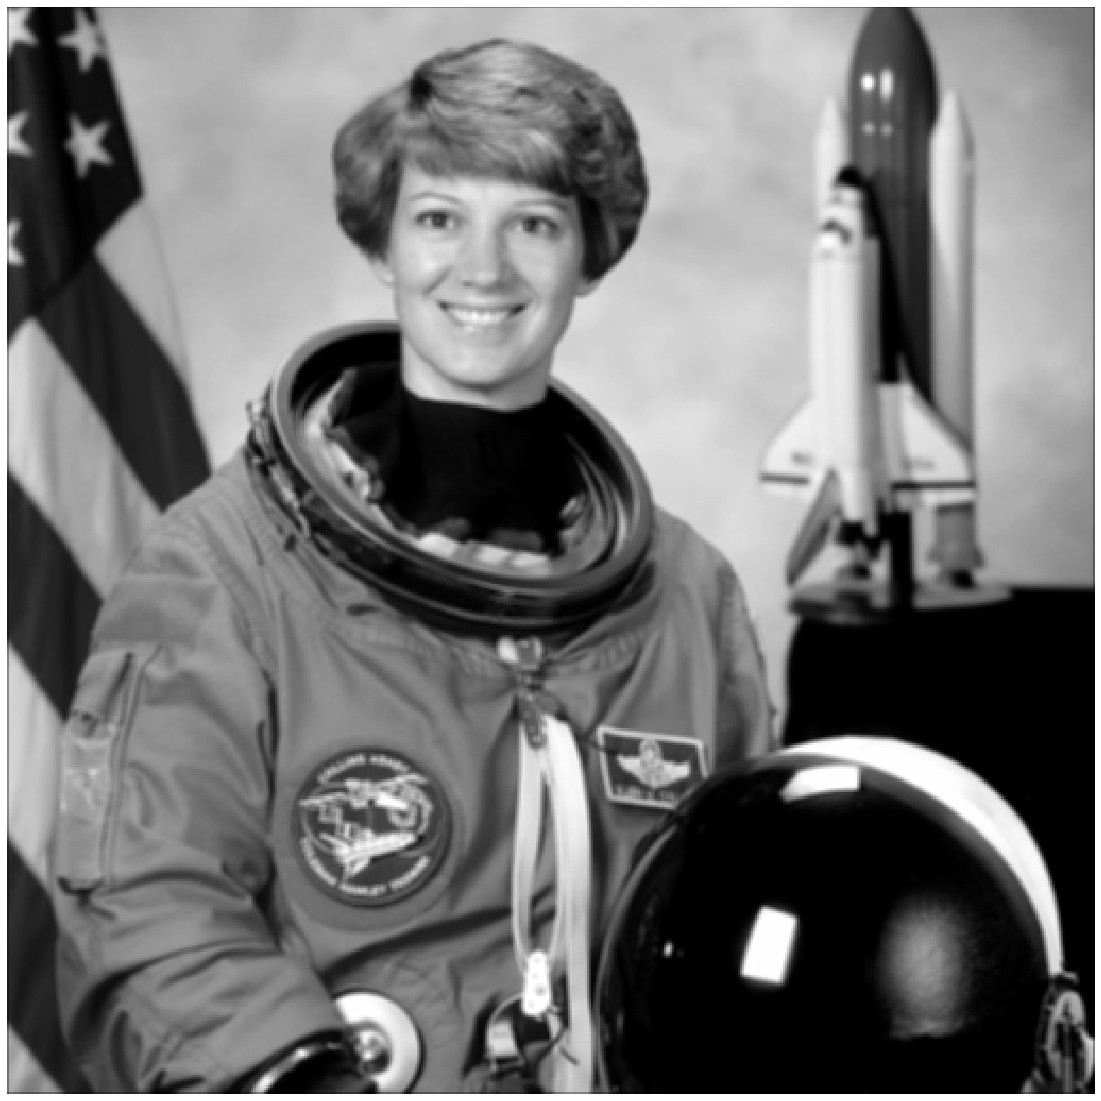

In [47]:
from scipy.ndimage.filters import convolve

avg_filter= np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

result_avg_image = convolve(image_gray, avg_filter, mode='constant', cval=0.0)

plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(result_avg_image, vmin=0,vmax=1,cmap='gray')
plt.show()

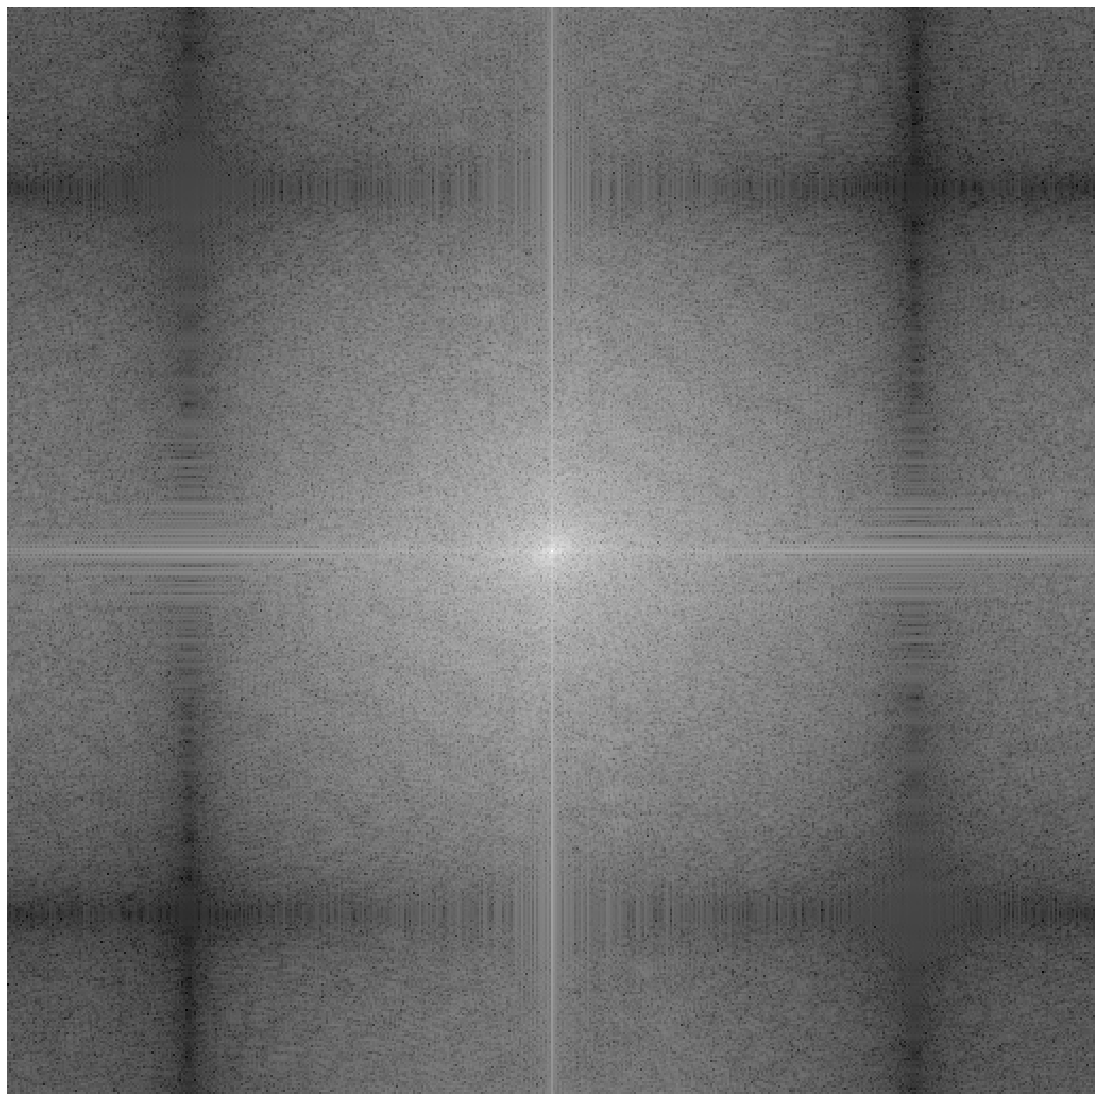

In [48]:
fs_avg_image = np.fft.fftn(result_avg_image)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(fs_avg_image))**2), cmap='gray')
plt.show()

**Question 15 :** downsample the image by a factor K. What do you observe?

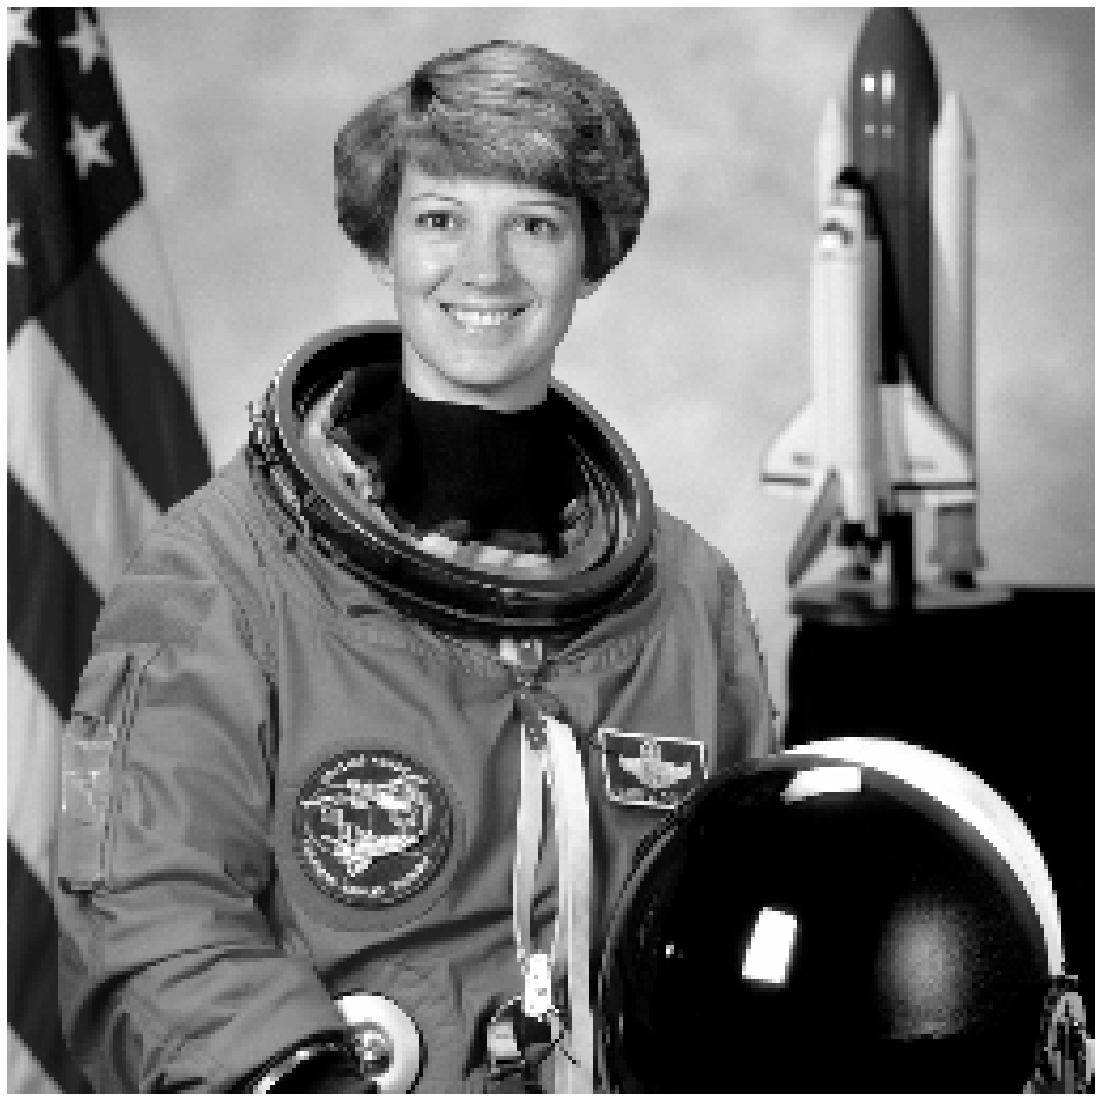

In [51]:
K = 2
image_downsampling = image_gray[::K,::K]

plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_downsampling, vmin=0,vmax=1,cmap='gray')
plt.show()

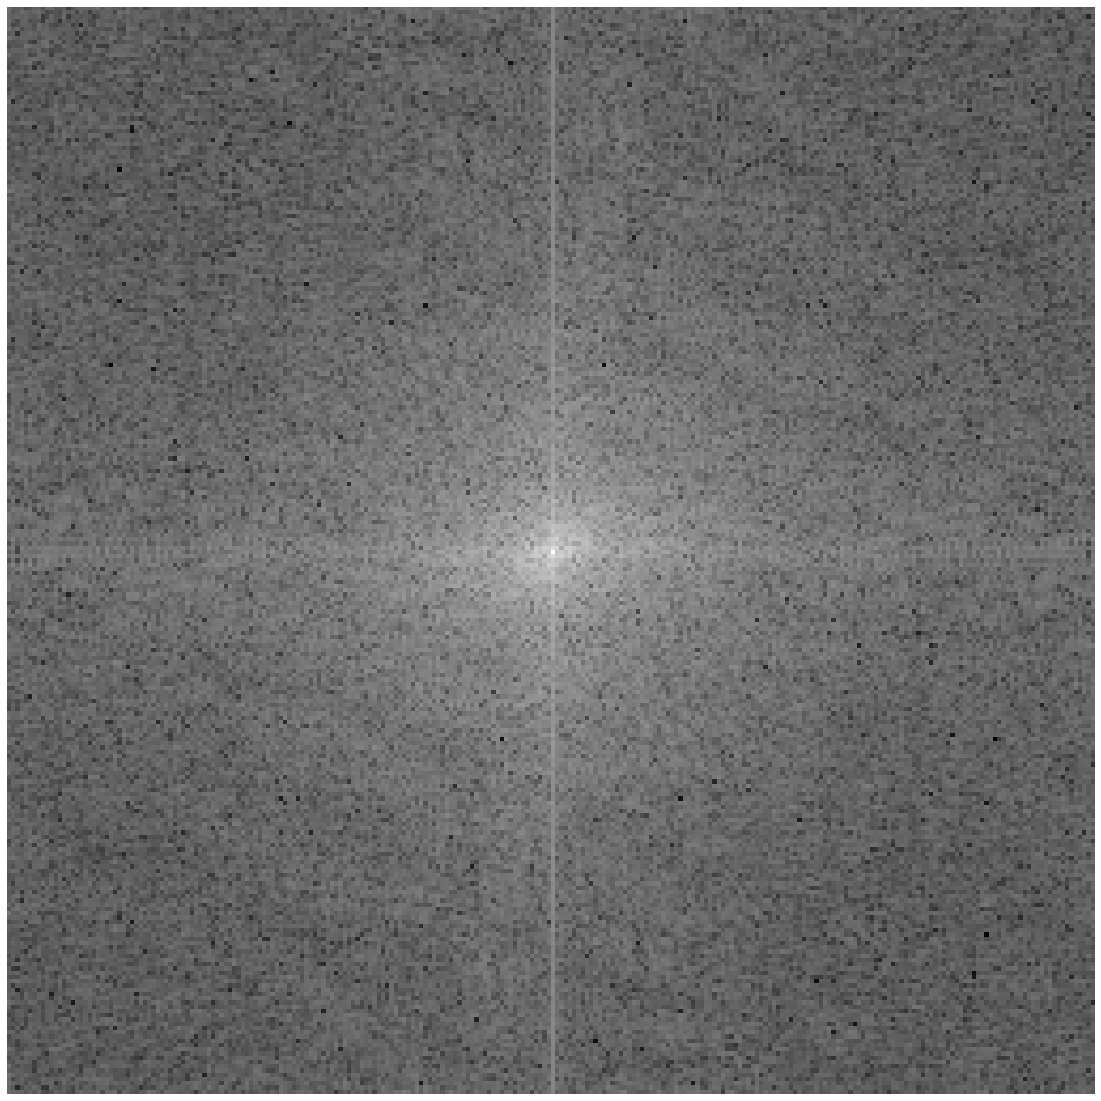

In [52]:
fs_alias_image = np.fft.fftn(image_downsampling)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(fs_alias_image))**2), cmap='gray')
plt.show()

**Question 16:** How to avoid aliasing?

The solution is to apply a low pass filter to eliminate the high frenquences and then we can do the downsampling without the effet aliasing.

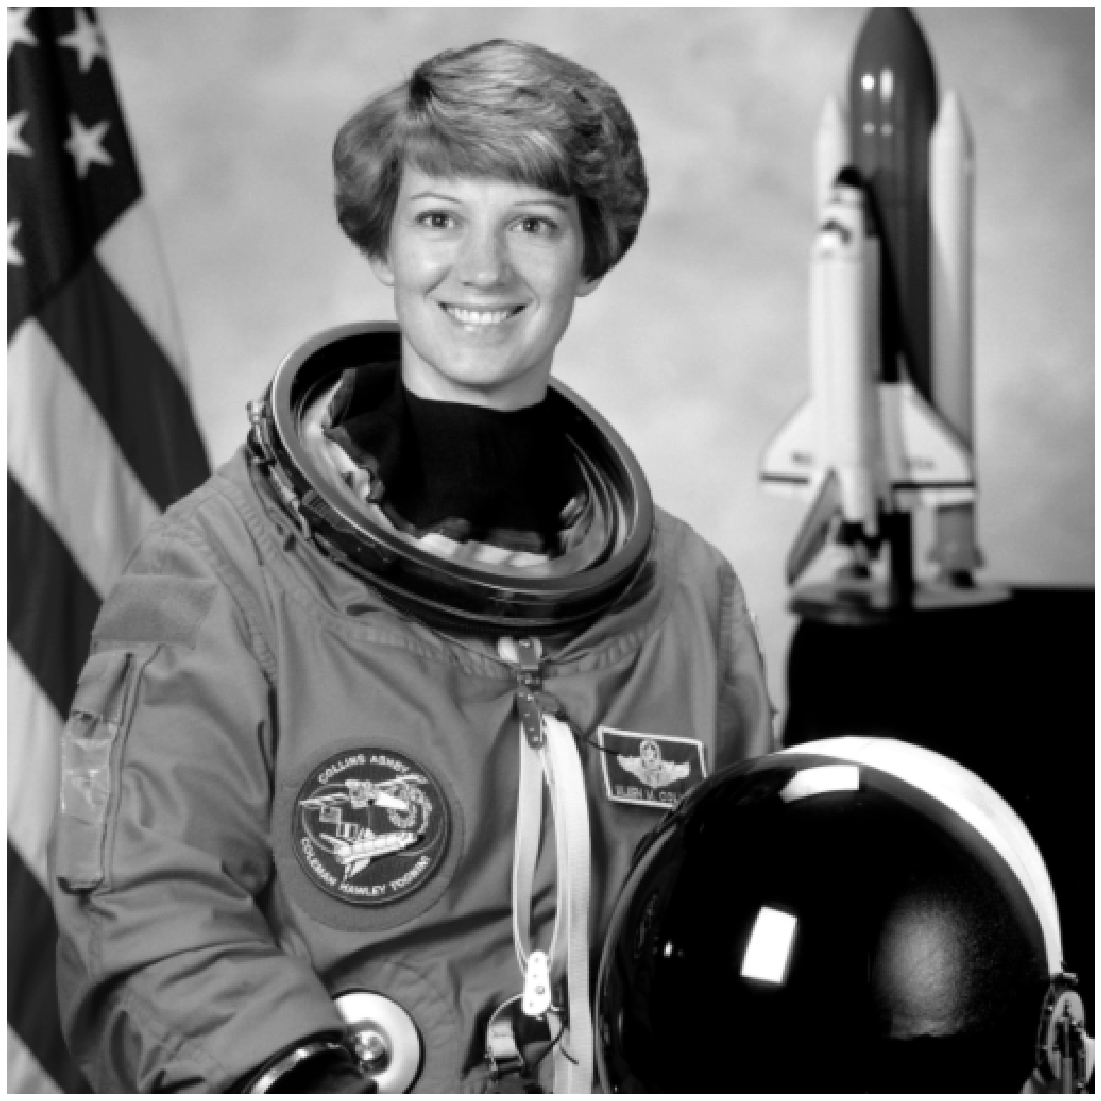

In [60]:
image_gaussian_2 = gaussian(image_gray, mode='mirror',sigma=0.5)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_gaussian_2, cmap='gray')
plt.show()

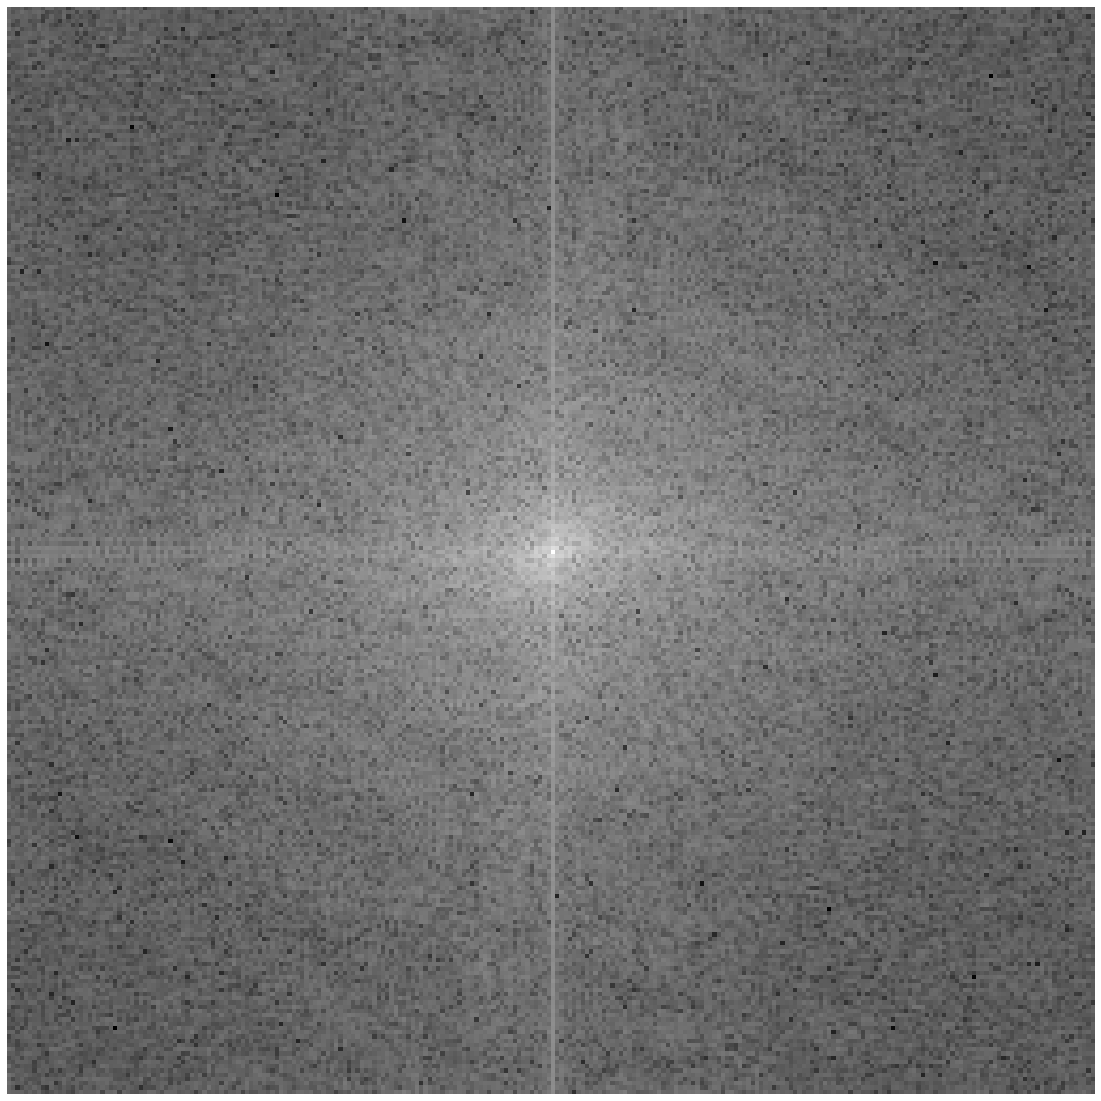

"plt.figure(figsize=(20,20))\nplt.axis('off')\nplt.imshow(image_downsampling, cmap='gray')\nplt.show()"

In [76]:
image_downsampling = image_gaussian_2[::K,::K]
fs_alias_image = np.fft.fftn(image_downsampling)
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(np.log(np.abs(np.fft.fftshift(fs_alias_image))**2), cmap='gray')
plt.show()
"""plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(image_downsampling, cmap='gray')
plt.show()"""

**Question 17:** How do you interpret the image that results from the following code ? 


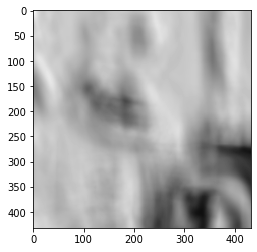

In [69]:
stars = image_gray[0:80,0:80]

M = stars.shape[0]
N = stars.shape[1]

#img2 = np.zeros((original_gray.shape[0]-M, original_gray.shape[1] - N))

img2 = np.zeros((image_gray.shape[0]-M, image_gray.shape[1] - N))
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        patch = image_gray[i:i+M,j:j+N ]
        img2[i,j] = np.sum(patch*stars)/(np.linalg.norm(patch)*np.linalg.norm(stars)) 

plt.imshow(img2,vmin=0,vmax=1,cmap='gray')

In [74]:
print('the max value is',np.max(img2))
print('the min value is',np.min(img2))

the max value is 1.0000000000000002
the min value is 0.05843615960445332


The similarity between first pathc and other patches. (covariance)